# Community Detection

In [55]:
!pip install igraph

In [56]:
from igraph import Graph
import igraph as ig

import matplotlib.pyplot as plt

Import the karate club network graph.

In [57]:
G = Graph.Famous('Zachary')

## Community Detection Algorithm from Pirrò Paper

1. **Louvain** (`louv`): a multi-level modularity optimization algorithm, which runs in time $O(\vert V \vert log \vert V \vert)$;
2. **WalkTrap** (`walk`): based on the idea that random walks are more likely to stay in the same community. This algorithm runs in time $O(\vert V \vert^2 log \vert V \vert)$;
3. **Greedy** (`gre`): based on a greedy modularity maximization strategy and running in time $O(\vert V \vert log^2 \vert V \vert )$;
4. **InfoMap** (`inf`): it returns a community structure, which provides the shortest description length for a random walk. This algorithm runs in time O(jEj);
5. **Label propagation** (`lab`): it assigns to every node one of k labels and then re-assigns labels to nodes in a way that each node takes the most frequent label of its neighbors. This algorithm runs in time $O(\vert E \vert)$;
6. **Leading Eigenvectors** (`eig`): a top-down hierarchical approach based on modularity. Its complexity is $O( \vert V \vert (\vert E \vert + \vert V \vert))$, or $O(\vert V \vert^2 )$ on a sparse graph;
7. **Edge-Betweeness** (`btw`): a hierarchical decomposition process where edges are removed in the decreasing order of their edge betweenness scores. This algorithm runs in time $O(\vert E \vert^2 \vert V \vert)$;
8. **SpinGlass** (`spin`): it reduces community detection to the problem of finding the ground state of an infinite spin glass. The complexity is $O(V^{3.2} )$;
9. **Optimal** (`opt`): it uses integer programming and has exponential complexity.
10. **Scalable Community Detection** (`scd`), which partitions the graph by maximizing the Weighted Community Clustering, a community detection metric based on triangle analysis. The time complexity is $O(\vert E \vert log \vert V \vert )$.

<Axes: >

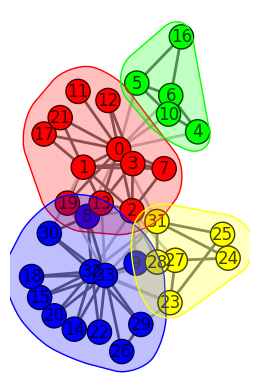

In [80]:
# 1. louv
louv = G.community_leiden(objective_function='modularity')
# louv = louv.as_clustering()

fig, ax = plt.subplots()
ig.plot(louv, target=ax, mark_groups=True, vertex_size=0.5, vertex_label=[v.index for v in G.vs])

<Axes: >

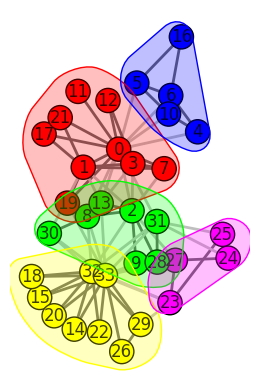

In [59]:
# 2. walk
walk = G.community_walktrap()
walk = walk.as_clustering()

fig, ax = plt.subplots()
ig.plot(walk, target=ax, mark_groups=True, vertex_size=0.5, vertex_label=[v.index for v in G.vs])

<Axes: >

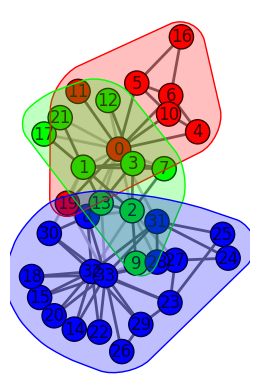

In [60]:
# 3. gre
gre = G.community_fastgreedy()
gre = gre.as_clustering()

fig, ax = plt.subplots()
ig.plot(gre, target=ax, mark_groups=True, vertex_size=0.5, vertex_label=[v.index for v in G.vs])

<Axes: >

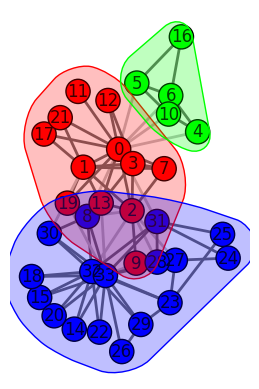

In [61]:
# 4. inf
inf = G.community_infomap()
# clust = inf.as_clustering()

fig, ax = plt.subplots()
ig.plot(inf, target=ax, mark_groups=True, vertex_size=0.5, vertex_label=[v.index for v in G.vs])

<Axes: >

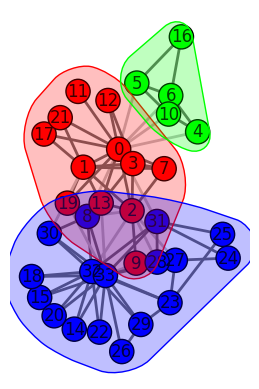

In [62]:
# 5. lab
lab = G.community_label_propagation()
# lab = lab.as_clustering()

fig, ax = plt.subplots()
ig.plot(lab, target=ax, mark_groups=True, vertex_size=0.5, vertex_label=[v.index for v in G.vs])

<Axes: >

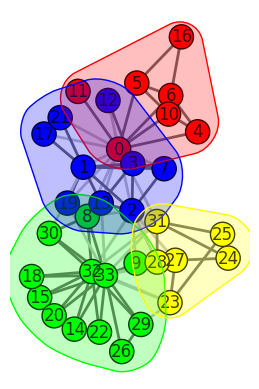

In [63]:
# 6. eig
eig = G.community_leading_eigenvector()
# eig = eig.as_clustering()

fig, ax = plt.subplots()
ig.plot(eig, target=ax, mark_groups=True, vertex_size=0.5, vertex_label=[v.index for v in G.vs])

<Axes: >

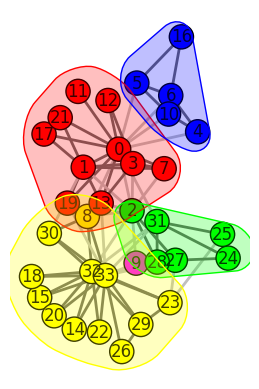

In [64]:
# 7. btw
btw = G.community_edge_betweenness()
btw = btw.as_clustering()

fig, ax = plt.subplots()
ig.plot(btw, target=ax, mark_groups=True, vertex_size=0.5, vertex_label=[v.index for v in G.vs])

<Axes: >

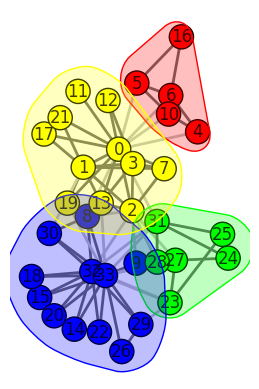

In [65]:
# 8. spin
spin = G.community_spinglass()
# spin = spin.as_clustering()

fig, ax = plt.subplots()
ig.plot(spin, target=ax, mark_groups=True, vertex_size=0.5, vertex_label=[v.index for v in G.vs])

<Axes: >

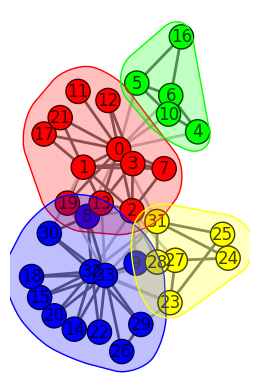

In [66]:
# 9. opt
opt = G.community_optimal_modularity()
# opt = opt.as_clustering()

fig, ax = plt.subplots()
ig.plot(opt, target=ax, mark_groups=True, vertex_size=0.5, vertex_label=[v.index for v in G.vs])

In [67]:
# 10. scd